In [1]:
#data manipulating
import pandas as pd

#machine learning algorithms
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

#visulization
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
X = data.iloc[:,:-1]
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [7]:
Y = data.iloc[:,-1]
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [8]:
X = X.values
Y = Y.values

In [9]:
X_train, X_test, Y_train,  Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123)

In [10]:
X.shape,X_train.shape,X_test.shape

((768, 8), (614, 8), (154, 8))

In [11]:
Y.shape,Y_train.shape,Y_test.shape

((768,), (614,), (154,))

Support Vector Machines

In [12]:
SV = svm.SVC()

In [13]:
SV.fit(X_train, Y_train)
Y_predict_sv = SV.predict(X_test)

In [14]:
SV_Ac = accuracy_score(Y_test, Y_predict_sv)
SV_Ac

0.7792207792207793

In [15]:
SV_Cm = confusion_matrix(Y_test, Y_predict_sv)
SV_Cm

array([[90,  6],
       [28, 30]], dtype=int64)

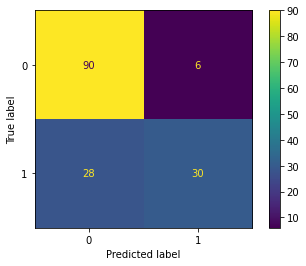

In [16]:
plot_confusion_matrix(SV,X_test,Y_test)
plt.show()

In [17]:
SV_CR = classification_report(Y_test, Y_predict_sv, labels = [0,1])
print(SV_CR) 

              precision    recall  f1-score   support

           0       0.76      0.94      0.84        96
           1       0.83      0.52      0.64        58

    accuracy                           0.78       154
   macro avg       0.80      0.73      0.74       154
weighted avg       0.79      0.78      0.76       154



k-Nearest Neighbours Classifier

In [18]:
kNN = KNeighborsClassifier(n_neighbors=5)

In [19]:
kNN.fit(X_train, Y_train)
kNN_Y = kNN.predict(X_test)

In [20]:
kNN_Ac = accuracy_score(Y_test, kNN_Y)
kNN_Ac

0.7597402597402597

In [21]:
kNN_Cm = confusion_matrix(Y_test, kNN_Y)
kNN_Cm

array([[84, 12],
       [25, 33]], dtype=int64)

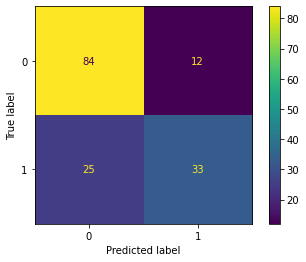

In [22]:
plot_confusion_matrix(kNN,X_test,Y_test)
plt.show()

In [23]:
kNN_CR = classification_report(Y_test, kNN_Y, labels = [0,1])
print(kNN_CR) 

              precision    recall  f1-score   support

           0       0.77      0.88      0.82        96
           1       0.73      0.57      0.64        58

    accuracy                           0.76       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.76      0.75       154



Decision Tree Classifier

In [24]:
dtree = DecisionTreeClassifier(max_leaf_nodes = 6, random_state= 0)

In [25]:
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(max_leaf_nodes=6, random_state=0)

In [26]:
dtree_Y = dtree.predict(X_test)

In [27]:
dtree_Ac = accuracy_score(Y_test, dtree_Y)
dtree_Ac

0.7727272727272727

In [28]:
dtree_Cm = confusion_matrix(Y_test, dtree_Y)
dtree_Cm

array([[79, 17],
       [18, 40]], dtype=int64)

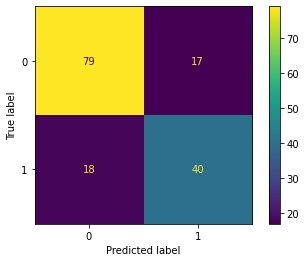

In [29]:
plot_confusion_matrix(dtree,X_test,Y_test)
plt.show()

In [30]:
dtree_CR = classification_report(Y_test, dtree_Y, labels = [0,1])
print(dtree_CR) 

              precision    recall  f1-score   support

           0       0.81      0.82      0.82        96
           1       0.70      0.69      0.70        58

    accuracy                           0.77       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.77      0.77      0.77       154



Results Comparision

In [31]:
print("Decision Tree Accuracy:",dtree_Ac,
      "\nSupport Vector Accuracy:",SV_Ac,
      "\nk Nearest Neighbours Accuracy:",kNN_Ac)

Decision Tree Accuracy: 0.7727272727272727 
Support Vector Accuracy: 0.7792207792207793 
k Nearest Neighbours Accuracy: 0.7597402597402597
